In [40]:
# Parses FASTA file using BioPython Library
from Bio import Alphabet
from Bio.Alphabet import Reduced
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
from Bio import SeqIO
import random
from random import seed
from random import randint
from random import choice
import numpy as np
from numpy.random import choice
import pandas as pd
import sys
import copy
import statistics
import matplotlib.pyplot as plt

In [85]:
EMPTY = ' '  
best_grids = []  
direction_matrix = []
score_matrix = []

def get_randomSol(protein):

    #--Local variable initialization--#
    current_element_idx = 0  # Index of the current element in protein
    # protein = 'HPPPPPPHH'  # Protein we are folding
    # protein = "HHPPHHHPHHPH" # Protein we are folding
    current_grid = []  # Grid in which we are currently folding
    current_num_H_bonds = 0
    max_num_H_bonds = 0  # Counters

    #-Fill the grid with empty characters-#
    # For each row of the grid
    for row in range(len(protein) * 2 - 1):

        # Create a new empty list for that row
        current_grid.append([])

        # For each column of the grid
        for col in range(len(protein) * 2 - 1):

            # Add an empty character at the given row/column
            current_grid[row].append(EMPTY)

    # Start the first protein element in the middle of the grid
    current_row = current_col = int((len(protein) * 2 - 1) / 2)

    new_direction_grid = []
    orientation = 2
    # Recursively find the best foldings, filling best_grid
    
    fold(protein, max_num_H_bonds, current_element_idx, current_grid,
        current_row, current_col, ' ', current_num_H_bonds, new_direction_grid, orientation)
    #print(max_num_H_bonds)
def fold(protein, max_num_H_bonds, current_element_idx, current_grid,
         current_row, current_col, direction, current_num_H_bonds, new_direction_grid, orientation):
    # orientation -1:left 1:right 2:up -2:down
    # Determine the new current row and column based on the current
    # direction
    rel_direction = ''
    if (orientation == -1):
        if(direction == 'L'):

            rel_direction = 'F'
            orientation = -1

        elif(direction == 'D'):

            rel_direction = 'L'
            orientation = -2

        elif(direction == 'U'):

            rel_direction = 'R'
            orientation = 2

    elif (orientation == 1):
        if(direction == 'R'):

            rel_direction = 'F'
            orientation = 1

        elif(direction == 'U'):

            rel_direction = 'L'
            orientation = 2

        elif(direction == 'D'):

            rel_direction = 'R'
            orientation = -2

    elif (orientation == 2):
        if(direction == 'U'):

            rel_direction = 'F'
            orientation = 2

        elif(direction == 'L'):
            rel_direction = 'L'
            orientation = -1

        elif(direction == 'R'):
            rel_direction = 'R'
            orientation = 1

    elif (orientation == -2):
        if(direction == 'D'):

            rel_direction = 'F'
            orientation = -2

        elif(direction == 'R'):

            rel_direction = 'L'
            orientation = 1

        elif(direction == 'L'):

            rel_direction = 'R'
            orientation = -1

    if direction == 'R':
        current_col += 1
    elif direction == 'D':
        current_row += 1
    elif direction == 'L':
        current_col -= 1
    elif direction == 'U':
        current_row -= 1

    # If we are able to place an element at the current row and column
    if current_grid[current_row][current_col] == EMPTY:
        #         np.append(direction_matrix, direction)
        #         direction_matrix.append()
        #-Make a copy of the current grid before we change it-#
        new_grid = []
        new_direction_grid_temp = ''
        new_direction_grid_temp = copy.deepcopy(new_direction_grid)
        new_direction_grid_temp += rel_direction
        for row in range(len(protein) * 2 - 1):
            new_grid.append([])
            for col in range(len(protein) * 2 - 1):
                new_grid[row].append(current_grid[row][col])

        # Place the protein in the new grid
        new_grid[current_row][current_col] = protein[current_element_idx]

        # Check for H-H bonds in the current fold
        if protein[current_element_idx] == 'H':

            # Check to the left
            if current_col > 0 and new_grid[current_row][current_col -
                                                         1] == 'H':
                current_num_H_bonds += 1

            # Check above
            if current_row > 0 and new_grid[current_row -
                                            1][current_col] == 'H':
                current_num_H_bonds += 1

            # Check to the right
            if current_col < len(new_grid[current_row]) - 1 and new_grid[
                    current_row][current_col + 1] == 'H':
                current_num_H_bonds += 1

            # Check below
            if current_row < len(new_grid) - 1 and new_grid[
                    current_row + 1][current_col] == 'H':
                current_num_H_bonds += 1

        # Move on to the next element index
        current_element_idx += 1

        # If not end of string, choose each direction and recur
        if current_element_idx != len(protein):
            for direction in ['R', 'D', 'L', 'U']:
                max_num_H_bonds = fold(protein, max_num_H_bonds,
                                       current_element_idx, new_grid,
                                       current_row, current_col, direction,
                                       current_num_H_bonds,  new_direction_grid_temp, orientation)

        else:
            # If end of string, check if the current fold has more
            # H-H bonds than the max we found before.
            # if true update the max.  If we have the same number of
            # H-H bonds, append the current grid to the list of best
            # grids
            if current_num_H_bonds > max_num_H_bonds:
                max_num_H_bonds = current_num_H_bonds
#               del best_grids[:]
#               del direction_matrix[:]
                best_grids.append(new_grid)
                score_matrix.append(current_num_H_bonds)
                direction_matrix.append(new_direction_grid_temp)
            elif current_num_H_bonds == max_num_H_bonds:
                best_grids.append(new_grid)
                score_matrix.append(current_num_H_bonds)
                direction_matrix.append(new_direction_grid_temp)

    # Return the count of the maximum number of H-H bonds
    return max_num_H_bonds

def get_Sequence(file):
    for seq_record in SeqIO.parse("6ezq.fasta.txt", "fasta"):
        x = 0
    my_seq = seq_record.seq
    # for index, letter in enumerate(my_seq):
    #     print("%i %s" % (index, letter))

    my_protein = seq_record.seq

    amino_dict = {'A':'H', 'R': 'P', 'N':'P', 'D':'P', 
                   'C':'H', 'Q':'P','E': 'P', 
                   'G':'P','H':'P','I':'H', 'L':'H',
                   'K':'P','M':'H','F':'H', 
                   'P':'H', 'S':'P','T':'P', 'W':'H', 'Y':'H',
                   'V':'H'}
    protein = ''
    for k in my_seq:
        if k in amino_dict:
            protein += amino_dict[k]
            
    return protein

def getDirection(direction, orientation):
    rel_direction = ''
    if (orientation == -1):
        if(direction == 'F'):

            rel_direction = 'L'
            orientation = -1

        elif(direction == 'L'):

            rel_direction = 'D'
            orientation = -2

        elif(direction == 'R'):

            rel_direction = 'U'
            orientation = 2

    elif (orientation == 1):
        if(direction == 'F'):

            rel_direction = 'R'
            orientation = 1

        elif(direction == 'L'):

            rel_direction = 'U'
            orientation = 2

        elif(direction == 'R'):

            rel_direction = 'D'
            orientation = -2

    elif (orientation == 2):
        if(direction == 'F'):

            rel_direction = 'U'
            orientation = 2

        elif(direction == 'L'):
            rel_direction = 'L'
            orientation = -1

        elif(direction == 'R'):
            rel_direction = 'R'
            orientation = 1

    elif (orientation == -2):
        if(direction == 'F'):

            rel_direction = 'D'
            orientation = -2

        elif(direction == 'L'):

            rel_direction = 'R'
            orientation = 1

        elif(direction == 'R'):

            rel_direction = 'L'
            orientation = -1

    return rel_direction, orientation


def create_empty_grid(protein):
    #-Fill the grid with empty characters-#
    # For each row of the grid
    current_grid = []
    for row in range(len(protein) * 2 - 1):

        # Create a new empty list for that row
        current_grid.append([])

        # For each column of the grid
        for col in range(len(protein) * 2 - 1):

            # Add an empty character at the given row/column
            current_grid[row].append(EMPTY)

    # Start the first protein element in the middle of the grid
    current_row = current_col = int((len(protein) * 2 - 1) / 2)
    return current_grid


def checkLegal(mut_list, protein):
    grid = create_empty_grid(protein)
    orientation = 2
    current_row = current_col = int(len(grid)/2)
    count = 0
    current_num_H_bonds = 0
    
    for direction in mut_list:
        
        previousColumn = current_col
        previousRow = current_row
        
        direction, orientation = getDirection(direction, orientation)
        if direction == 'R':
            current_col += 1
        elif direction == 'D':
            current_row += 1
        elif direction == 'L':
            current_col -= 1
        elif direction == 'U':
            current_row -= 1
        if(grid[current_row][current_col] != EMPTY):
            return False, -1
        else:
            grid[current_row][current_col] = protein[count]
            if protein[count] == 'H':
                #print("H")
                # Check to the left
                if current_col > 0 and grid[current_row][current_col -
                                                             1] == 'H' and (current_col-1 != previousColumn):
                    current_num_H_bonds += 1
                    #print("+1")
                # Check above
                if current_row > 0 and grid[current_row -
                                                1][current_col] == 'H' and (current_row-1 != previousRow):
                    current_num_H_bonds += 1
                    #print("+1")
                # Check to the right
                if current_col < len(grid[current_row]) - 1 and grid[
                        current_row][current_col + 1] == 'H' and (current_col+1 != previousColumn):
                    current_num_H_bonds += 1
                    #print("+1")
                # Check below
                if current_row < len(grid) - 1 and grid[
                        current_row + 1][current_col] == 'H' and (current_row+1 != previousRow):
                    current_num_H_bonds += 1
                    #print("+1")
        #print(count)        
        count += 1
    #print("Current number H bonds", current_num_H_bonds)
    return True, current_num_H_bonds

def crossover(crossover_cutoff, protein, population, top_100_direction_matrix):
    mutate_matrix = []
    mutate_score_matrix = []
    
    while (len(mutate_matrix) < population):
        rnd_Numb = randint(0,
                           len(top_100_direction_matrix) - 1)
        rnd_Numb2 = randint(0,
                            len(top_100_direction_matrix) - 1)
        
        combined = top_100_direction_matrix[
            rnd_Numb][:crossover_cutoff] + top_100_direction_matrix[rnd_Numb2][
                crossover_cutoff:]
        
        check, current_num_H_bonds = checkLegal(combined, protein)
        
        if (check == True):
            mutate_score_matrix.append(current_num_H_bonds)
            mutate_matrix.append(
                top_100_direction_matrix[rnd_Numb][:crossover_cutoff] +
                top_100_direction_matrix[rnd_Numb2][crossover_cutoff:])

    return mutate_matrix, mutate_score_matrix

def select_top_sol(percent, initialPopulation, population,combined_top200_direction_matrix, combined_top200_score_matrix):
    num_selection = int(percent * initialPopulation)
    zipped_list = zip(combined_top200_direction_matrix, combined_top200_score_matrix)
    sorted_score_matrix, sorted_direction_matrix = zip(*sorted(zip(combined_top200_score_matrix,combined_top200_direction_matrix), reverse=True))
    
    final_score_matrix = []
    final_direction_matrix = []
    for i in range(num_selection):
        final_score_matrix.append(sorted_score_matrix[i])
        final_direction_matrix.append(sorted_direction_matrix[i])
    
    #print(initialPopulation, num_selection, population)
    rpercent_direction_matrix, rpercent_score_matrix = zip(*random.sample(list(zip(sorted_direction_matrix, sorted_score_matrix)), initialPopulation-num_selection))
    
    final_score_matrix.extend(rpercent_score_matrix)
    final_direction_matrix.extend(rpercent_direction_matrix)
    
    return final_direction_matrix, final_score_matrix

def mutateAll(direction_matrix, mutation_p, protein):
    #probability of mutate or not
    mutate_choice = [True, False]
    mutate_prob = [mutation_p, (1-mutation_p)]
    dir_matrix_mutate_temp = []
    
    for a in range(len(direction_matrix)):
        
        b = 0
        
        while(b < len(direction_matrix[a])):
           
            if(choice(mutate_choice, p=mutate_prob)):
                current_dir = direction_matrix[a][b]
                new_dir = getMutate(current_dir)
                j = new_dir
                direction_matrix[a][b] = new_dir
                check, score = checkLegal(direction_matrix[a], protein)
                
                if (not check):
                    direction_matrix[a][b] = current_dir
                    b -= 1
                else:
                    b += 1
        
            else:
                b += 1
                
    
    return direction_matrix

def check_all(direction_matrix, protein):
    score_mtx = []
    
#     for i in range(len(direction_matrix)):
#         check, score = checkLegal(direction_matrix[i], protein)
#         print(direction_matrix[i])
#         print(score)
#         score_mtx.append(score)
        
    for i in direction_matrix:
        #print(i)
        check, score = checkLegal(i, protein)
        score_mtx.append(score)
        #print(score)
    return score_mtx


def getMutate(value):
    rnd_Num1 = choice([
                            i for i in ['F','L','R']
                            if i not in [value]
                        ])
    return rnd_Num1

def do_filter(direction_matrix, score_matrix, protein):
    
    #Filters for length of directions
    count = 0
    new_direction_matrix, new_score_matrix = [], []
    for i in direction_matrix:
        if(len(i) == len(protein)-1):

            new_direction_matrix.append(direction_matrix[count])
            new_score_matrix.append(score_matrix[count])


        count += 1
        
    return new_direction_matrix, new_score_matrix

In [86]:
def main(file, pop_size, mutate_rate, crossover_cutoff, selection_percent, stop_criteria_gen):
    
    protein = get_Sequence(file) 
    
    get_randomSol(protein)

    new_direction_matrix, new_score_matrix = do_filter(direction_matrix, score_matrix, protein)

    new_score_matrix = check_all(new_direction_matrix, protein)

    top_100_direction_matrix, top_100_new_score_matrix = zip(*random.choices(list(zip(new_direction_matrix, new_score_matrix)), k =pop_size))
    crossover_cutoff = int(len(protein) * crossover_cutoff)
    count_main = 0
    max_score_list = []
    score_list = []
    median_score_list = []
    while count_main < stop_criteria_gen:
    
        mutated_matrix, mutated_score_matrix = crossover(crossover_cutoff, protein, pop_size, top_100_direction_matrix)

        combined_top200_direction_matrix = []
        combined_top200_direction_matrix.extend(top_100_direction_matrix)
        combined_top200_direction_matrix.extend(mutated_matrix)

        combined_top200_score_matrix = []
        combined_top200_score_matrix.extend(top_100_new_score_matrix)
        combined_top200_score_matrix.extend(mutated_score_matrix)
        #direction and score matrix after selection
        fdirect, fscore = select_top_sol(selection_percent,len(top_100_direction_matrix), len(combined_top200_direction_matrix),
                                        combined_top200_direction_matrix, combined_top200_score_matrix)
    #     print(len(fdirect), len(fscore))
        fscore.sort()
    #     print(fscore)
        score_temp = sorted(top_100_new_score_matrix)
    #     print(score_temp)

        dir_temp_matrix = copy.deepcopy(fdirect)
        new_dir_mtx = mutateAll(dir_temp_matrix, mutate_rate, protein)

        new_score_mtx = check_all(new_dir_mtx, protein)
        score_list.append(sum(new_score_mtx)/len(new_score_mtx))
        max_score_list.append(max(new_score_mtx))
        median_score_list.append(statistics.median(new_score_mtx))
        count_main += 1
    #print(score_list)
    return score_list, max_score_list, median_score_list
#     old_score_mtx = check_all(fdirect, protein)
    
#     print(new_dir_mtx[-1])
#     print(fdirect[-1])

    # print("length of fscore, oldscore, new score", len(fscore), len(old_score_mtx), len(new_score_mtx))
#     print(fscore)
#     old_score_mtx.sort()
#     new_score_mtx.sort()
#     print(old_score_mtx)
#     print(new_score_mtx)
#     print(new_score_mtx.count(1))
    
    
# file = str(sys.argv[1])
# selection_percent = float(sys.argv[2])
# pop_size = int(sys.argv[3])
# mutate_rate = float(sys.argv[4])
# crossover_cutoff = float(sys.argv[5])
# stop_criteria_gen = int(sys.argv[6])

file = "6ezq.fasta.txt"
pop_size = 100
mutate_rate = 0.001
crossover_cutoff = 0.8
selection_percent = 0.05
stop_criteria_gen = 200
score_list, max_score_list, median_score_list = main(file, pop_size, mutate_rate, crossover_cutoff, selection_percent, stop_criteria_gen)


0


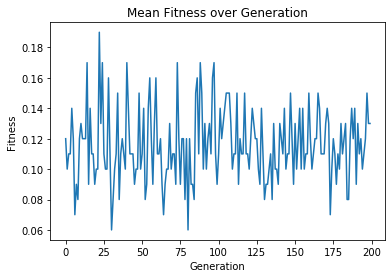

In [87]:
plt.plot(score_list)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Mean Fitness over Generation')
plt.savefig('meanFitnessPlot.png')
plt.show()


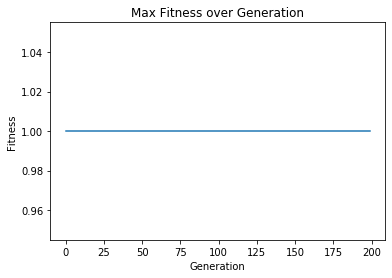

In [88]:
plt.plot(max_score_list)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Max Fitness over Generation')
plt.savefig('maxFitnessPlot')
plt.show()


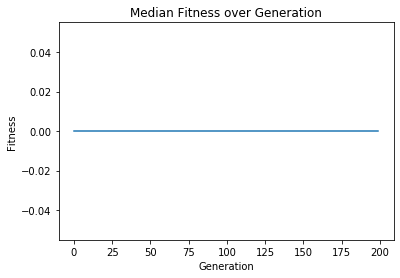

In [89]:
plt.plot(median_score_list)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Median Fitness over Generation')
plt.savefig('MedianFitnessPlot')
plt.show()
